<a href="https://colab.research.google.com/github/ucchol/Machine-Learning-CS--5361/blob/main/Naive_Bayes_Copy_of_%5BSpring_2022%5D_CS_4361_5361_Asif_Rahman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Before you start**

Make a copy of this Colab by clicking on File > Save a Copy in Drive

After making a copy, add your student id, last name, and first name to the title.

In [ ]:
student_name = "Asif Rahman"
student_id = "80741895"

# Exercises Naive Bayes Classifier

## Naive Bayes - Example

Consider a dataset with 3 classes and 5 binary attributes. Let the arrays p_class and p_att_given_class be:

In [ ]:
import numpy as np

p_class = np.ones(3)/3
p_att_given_class = np.array([[0.72, 0.21, 0.89, 0.47, 0.64],[0.32, 0.82, 0.54, 0.82, 0.17],[0.76, 0.65, 0.74, 0.31, 0.75]])

print(p_class)
print()
print(p_att_given_class)


[0.33333333 0.33333333 0.33333333]

[[0.72 0.21 0.89 0.47 0.64]
 [0.32 0.82 0.54 0.82 0.17]
 [0.76 0.65 0.74 0.31 0.75]]


where p_class[i] represents the probability that an example belongs to class i and p_att_given_class[i,j] 
represents the probability that attribute j in an example of class i is equal to 1. 

What is the probability that for an example of class 2, attribute 0 is equal to 1?

In [ ]:
print(p_att_given_class[2,0])

0.76


What is the probability that for an example of class 1, attribute 4 is equal to 0?

In [ ]:
print(1-p_att_given_class[1,4])

0.83


How would the Naïve Bayes classifier classify example [1,1,1,0,0]? 

In [ ]:
def classify(x,pc,pac):
  p = pc 
  for i in range(x.shape[0]): #i = 3
    if x[i]==1:
      p = p* pac[:,i] 
    else:
      p = p*(1-pac[:,i])
  p = p/np.sum(p)
  print(p)
  return np.argmax(p)


In [ ]:
test_example = np.array([1,1,1,0,0])

classify(test_example,p_class,p_att_given_class)

[0.24       0.10666667 0.25333333]
[0.0504     0.08746667 0.16466667]
[0.044856   0.047232   0.12185333]
[0.23361808 0.19261693 0.57376499]


2

In [ ]:
def classify_no_loops(x,pc,pac):
  p = x*pac + (1-x)*(1-pac)
  p = np.prod(p, axis=1)
  p = pc*p
  p = p/np.sum(p)
  print(p)
  return np.argmax(p)

In [ ]:
test_example = np.array([1,1,1,0,0])

classify_no_loops(test_example, p_class, p_att_given_class)


[0.23361808 0.19261693 0.57376499]


2

## Exercise 1

Write a program to classify the MNIST dataset using the Naive Bayes classifer. 

Read the dataset

In [ ]:
import tensorflow as tf
 
mnist_dataset = tf.keras.datasets.mnist.load_data(path="mnist.npz")
 
(x_train, y_train), (x_test, y_test) = mnist_dataset
"""
print(x_train.shape)
print(y_train.shape)
 
print(x_test.shape)
print(y_test.shape)"""

"""print(x_test.shape)
print(y_test.shape)
print(y_test[1])
print(x_test[1])"""

'print(x_test.shape)\nprint(y_test.shape)\nprint(y_test[1])\nprint(x_test[1])'

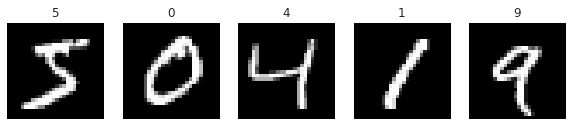

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#print(x_test.shape)
#print(y_test.shape)
#print(y_test[1])
#print(x_test[1])

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style='darkgrid')  # default style
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
for i in range(5):
  image = x_train[i]
  label = y_train[i]
  label_name = y_train[i]
  axs[i].imshow(image, cmap='gray')  # imshow renders a 2D grid
  axs[i].set_title(label_name)
  axs[i].axis('off')
plt.show()


x_train = np.float32(x_train/255).reshape(x_train.shape[0],-1)#normalize the values to range from 0 to 1
x_test = np.float32(x_test/255).reshape(x_test.shape[0],-1)#normalize the values to range from 0 to 1
#print(x_test.shape)
#print(x_test[1])

#for test take smaller data sets
#(x_train, y_train) = (x_train[:6000], y_train[:6000])
#(x_test, y_test) = (x_test[:1000], y_test[:1000])

Create a new dataset using binary attributes as follows:

m = mean pixel value in x_train

x_train_binary[i,j]  =  1 if x_train[i,j] >m; otherwise x_train_binary[i,j] = 0

x_test_binary[i,j]  =  1 if x_test[i,j] >m; otherwise x_test_binary[i,j] = 0



In [ ]:
# Your code here
m = np.mean(x_train)
print(m)
x_train_binary = np.copy(x_train)
x_test_binary = np.copy(x_test)
x_train_binary[x_train_binary <= m] = 0.0 
x_train_binary[x_train_binary > m] = 1.0 
x_test_binary[x_test_binary <= m] = 0.0
x_test_binary[x_test_binary > m] = 1.0
print(x_test_binary.shape)
#print(x_test_binary[1])


0.13066062
(10000, 784)


Compute class probabilities (p_class) from training data, where p_class[i] represents the probability that an example belongs to class i. You can estimate this by dividing the number of instances in your training dataset that belong to class i over the number of training examples.

In [ ]:
# Your code here
classes_in_dataset = np.unique(y_train)
print(classes_in_dataset)
p_class = np.ones(classes_in_dataset.shape)
print(p_class)
p_class = np.zeros(classes_in_dataset.shape)
print(p_class)

for x in classes_in_dataset:
  p_class[x] = np.count_nonzero(y_train==x)
print(np.sum(p_class))
print(p_class)
p_class = p_class/y_train.size
print(p_class)
print(p_class.shape[0])
print(x_train.shape[1])

[0 1 2 3 4 5 6 7 8 9]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
60000.0
[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]
[0.09871667 0.11236667 0.0993     0.10218333 0.09736667 0.09035
 0.09863333 0.10441667 0.09751667 0.09915   ]
10
784


Compute conditional probabilities (p_att_given_class) from training data, where p_att_given_class[i,j] represents the probability that attribute j in an example of class i is equal to 1. You can estimate this by dividing the number of times attribute j is equal to 1 in training instances of class j over the number of training instances of class i

In [ ]:
# Your code here
print(x_train_binary.shape)
print(x_train_binary.sum(axis=0).shape)
p_att_given_class = np.zeros(p_class.shape[0]*x_train.shape[1]).reshape(p_class.shape[0], x_train.shape[1])
for x in classes_in_dataset:
  class_instances = x_train_binary[y_train==x]
  tt = class_instances.sum(axis=0)
  p_att_given_class[x] = class_instances.sum(axis=0)/class_instances.shape[0]
  #print(class_instances.shape)
  #print(class_instances.size)
  #print(tt)
print(p_att_given_class.shape)
print(p_att_given_class[1])

(60000, 784)
(784,)
(5923, 784)
4643632
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00 1.000e+00
 0.000e+00 1.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
 1.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 2.000e+00 3.000e+00
 2.000e+00 1.000e+00 2.000e+00 0.000e+00 1.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00 2.000e+00 2.000e+00
 3.000e+00 4.000e+00 1.000e+01 2.100e

Classify test data - print accuracy and confusion matrix (feel free to use sklearn to print the accuracy and confusion matrix)




In [ ]:
# Your code here
from sklearn.metrics import accuracy_score, confusion_matrix

y_prediction = np.zeros(y_test.shape)
for i in range(y_prediction.shape[0]):
  y_prediction[i] = classify_no_loops(x_test_binary[i], p_class, p_att_given_class)
print(y_prediction)
print("Accuracy: {}".format(accuracy_score(y_test, y_prediction)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_prediction))

Streaming output truncated to the last 5000 lines.
[4.29485519e-066 1.86371420e-105 4.12141089e-069 5.59430382e-051
 3.77733542e-014 1.62734976e-028 0.00000000e+000 2.18841700e-023
 7.93354471e-033 1.00000000e+000]
[1.00000000e+00 0.00000000e+00 1.07078645e-62 0.00000000e+00
 2.33885765e-89 2.90875205e-44 2.38620792e-78 0.00000000e+00
 2.57935240e-91 0.00000000e+00]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[1.77664747e-053 1.15301967e-165 9.62358682e-051 1.00000000e+000
 0.00000000e+000 4.48571548e-020 0.00000000e+000 2.70263602e-055
 5.53858111e-025 5.59344977e-052]
[1.00000000e+000 0.00000000e+000 1.50671760e-085 5.81606744e-100
 2.94824211e-108 8.56603955e-055 4.12171569e-095 0.00000000e+000
 2.81943000e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 1.59065011e-34 0.00000000e+00
 0.00000000e+00 3.98620796e-20 1.00000000e+00 0.00000000e+00
 4.28668099e-17 0.00000000e+00]
[6.69985439e-99 1.00000000e+00 5.30784022e-39 9.42599511e-48
 6.72860011e-65 5.92354139e-49 2.00877263e-70 0.00000000

## Submission Instructions

1. File > Download .ipynb
2. Go to Blackboard, find the submission page, and upload the .ipynb file you just downloaded.